In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Max columns and rows for easier viewing of certain operations below

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [3]:
# Read in csv

df = pd.read_csv('../data/train.csv')

In [4]:
# View dataframe head to get an idea of the data

df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
# Check datatype for each column

df.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
SalePrice         int64
Length: 81, dtype: object

After importing the libraries, reading in the CSV previewing the dataframe and checking the datatypes, I used .describe() to get an idea of what the minimum and maximum values were for each row. This would later be helpful in finding features that had a 0 value indicating the lack of that feature (like basement) and also to consider dropping outliers. After which I calculated the sum of all null values for each column. This would help me to identify which columns of interest I absolutely needed to address to get a working model.

In [6]:
# Focus on min values for 0s for features that aren't present (like Basement SF)
# Consider max values for outliers that may affect the model

df.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [7]:
# Sum all null values by column

df.isnull().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    330
               ... 
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
SalePrice         0
Length: 81, dtype: int64

In [8]:
# View existing column names to check value_counts for each column below

df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

Below I listed the initial columns I was interested in that were categorical columns. I used the below cell to cycle through each column using a .value_counts() function while taking notes about each category. Some of the aspects I was intersted in were any the min compared to max of each column, which subcategories had too few counts that they would need to be generalized or combined with another subcategory, and the distribution of subcategories for each column in case the values were primarily the same and wouldn't add much value (like Utilities).

In [9]:
# Check value_counts (for columns of interest), personal notes, min/max value counts and how to map small groups

# Street               # DONE          DON'T USE, 2044 / 7 feature split
# Land Contour         # DONE          Max: 1843 / Min: 43
# Utilities            # DONE          Max: 2049 / Min: 1
# Neighborhood         # DONE          Max: 310 / Min: 1, 2, 3, 6; NEED TO CHECK MAP AND GROUP SMALL NUMBER
# Condition 1          # DONE          Combined RRNn/RRNe, RRAn/RRAe
# Condition 2          # DONE          DO NOT USE
# Bldg Type            # DONE          Max: 1700 / Min: 46
# House Style          # DONE          COMBINE 1.5Fin and 2.5Fin, 1.5Unf and 2.5Unf
# Overall Qual         # DONE          Max: 1168 / Min: 4; COMBINE 1, 2, 3 values
# Roof Style           # DONE          Max: 1619 / Min: 3; DON'T USE AT FIRST
# Exter Cond           # DONE          COMBINE Gd and Ex, Po and Fa
# Foundation           # DONE          Max: 926 / Min: 2, 5; CONSIDER COMBINING Wood and Stone
# Bsmt Cond            # DONE          COMBINE Gd and Ex, Po and Fa
# BsmtFin Type 1       # DONE          Max: 615 / Min: 102
# BsmtFin Type 2       # DONE          DON'T USE; Max: 1749 / Min: 23 
# Total Bsmt SF        # DONE          USE AS NUMERICAL
# Heating              # DONE          COMBINE NON-GAS METHODS (Wall, Grav, OthW)
# Central Air          # DONE          Y: 1910 / N: 141
# Kitchen AbvGr        # DONE          COMBINE 0 and 1, 2 and 3
# Kitchen Qual         # DONE          USE AS IS
# Fireplaces           # DONE          COMBINE 2 and 3 and 4
# Garage Type          # DONE          USE AS IS
# Garage Cars          # DONE          COMBINE 3 and 4 and 5
# Paved Drive          # DONE          DON'T USE AT FIRST, USE AS IS
# has_pool (Pool QC)   # DONE          0: 2042 / 1: 9
# SalePrice            # DONE          Y target

df['Pool QC'].value_counts()

Gd    4
Fa    2
TA    2
Ex    1
Name: Pool QC, dtype: int64

I then started to run some visualizations to explore the data. I ran a heatmap that showed the correlation between any numeric columns and the target (SalePrice). From this information I plotted the three highest correlated features against SalePrice. Based on the plot of Gr Liv Area I then expanded that visualization into its own plot for greater detail.

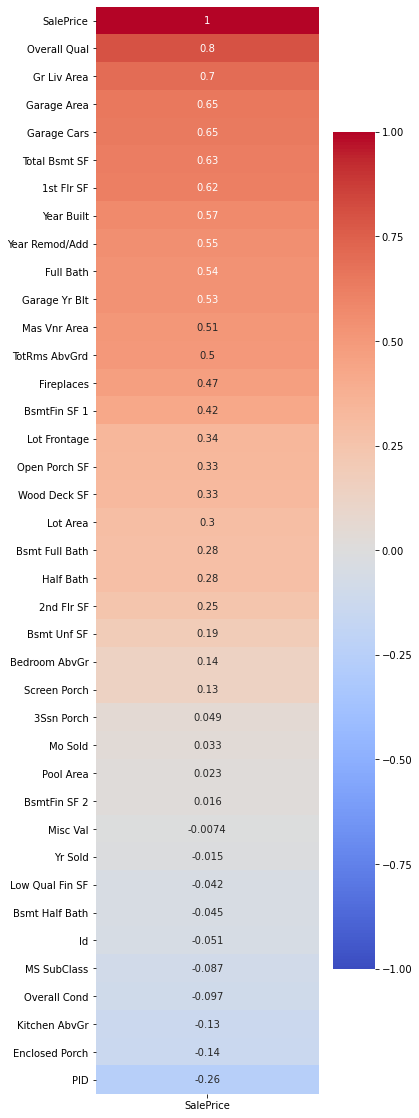

In [10]:
# Check the heatmap with respect to SalePrice to see which features have the highest correlation

corr = df.corr()
plt.figure(figsize=(5, 20))
sns.heatmap(corr[['SalePrice']].sort_values(by='SalePrice', ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

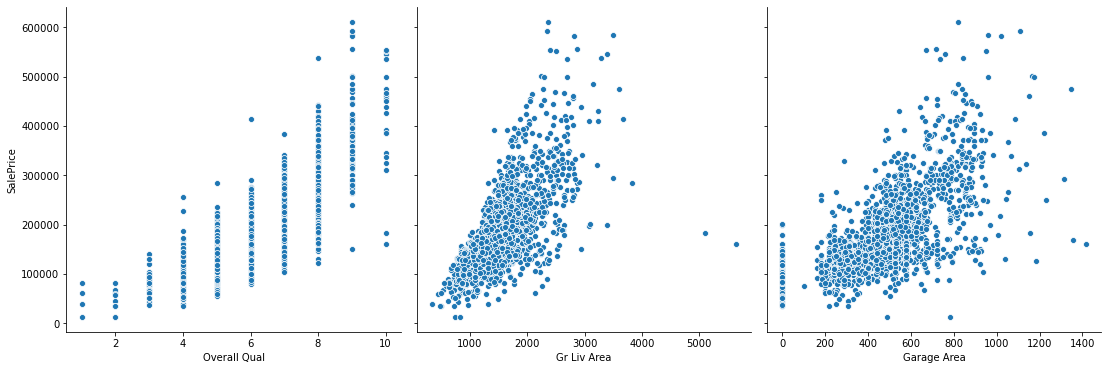

In [11]:
# Compare the plots of the three highest correlated features to SalePrice

sns.pairplot(df, y_vars=['SalePrice'], x_vars=['Overall Qual', 'Gr Liv Area', 'Garage Area'], height=5);

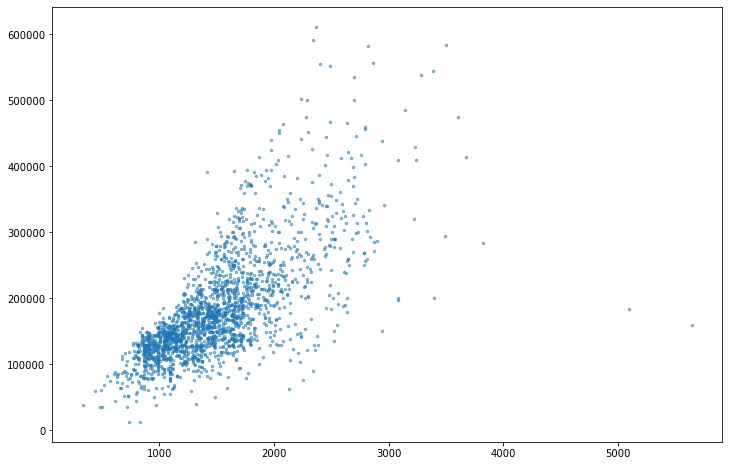

In [12]:
# Plot the relationship between the Gr Liv Area and Sale Price

plt.figure(figsize=(12,8))
plt.scatter(df['Gr Liv Area'], df['SalePrice'], s=6, alpha=.5);

Lastly, I took the columns I knew had outlier data points and sorted those columns descending so I could understand where I could cut off data values to remove outliers and test the effectiveness on my model. I then ran histograms for all my numerical columns so I could consider which values could potentially be normalized using either a log function or a scaling function.

In [13]:
# Consider columns with outliers that I may end up dropping to improve model performance

df['Lot Area'].sort_values(ascending=False)
df['Gr Liv Area'].sort_values(ascending=False)
df['Total Bsmt SF'].sort_values(ascending=False)

960     6110.0
1885    5095.0
1147    3206.0
328     3200.0
1164    3094.0
         ...  
1377       0.0
1889       0.0
183        0.0
1022       0.0
1327       NaN
Name: Total Bsmt SF, Length: 2051, dtype: float64

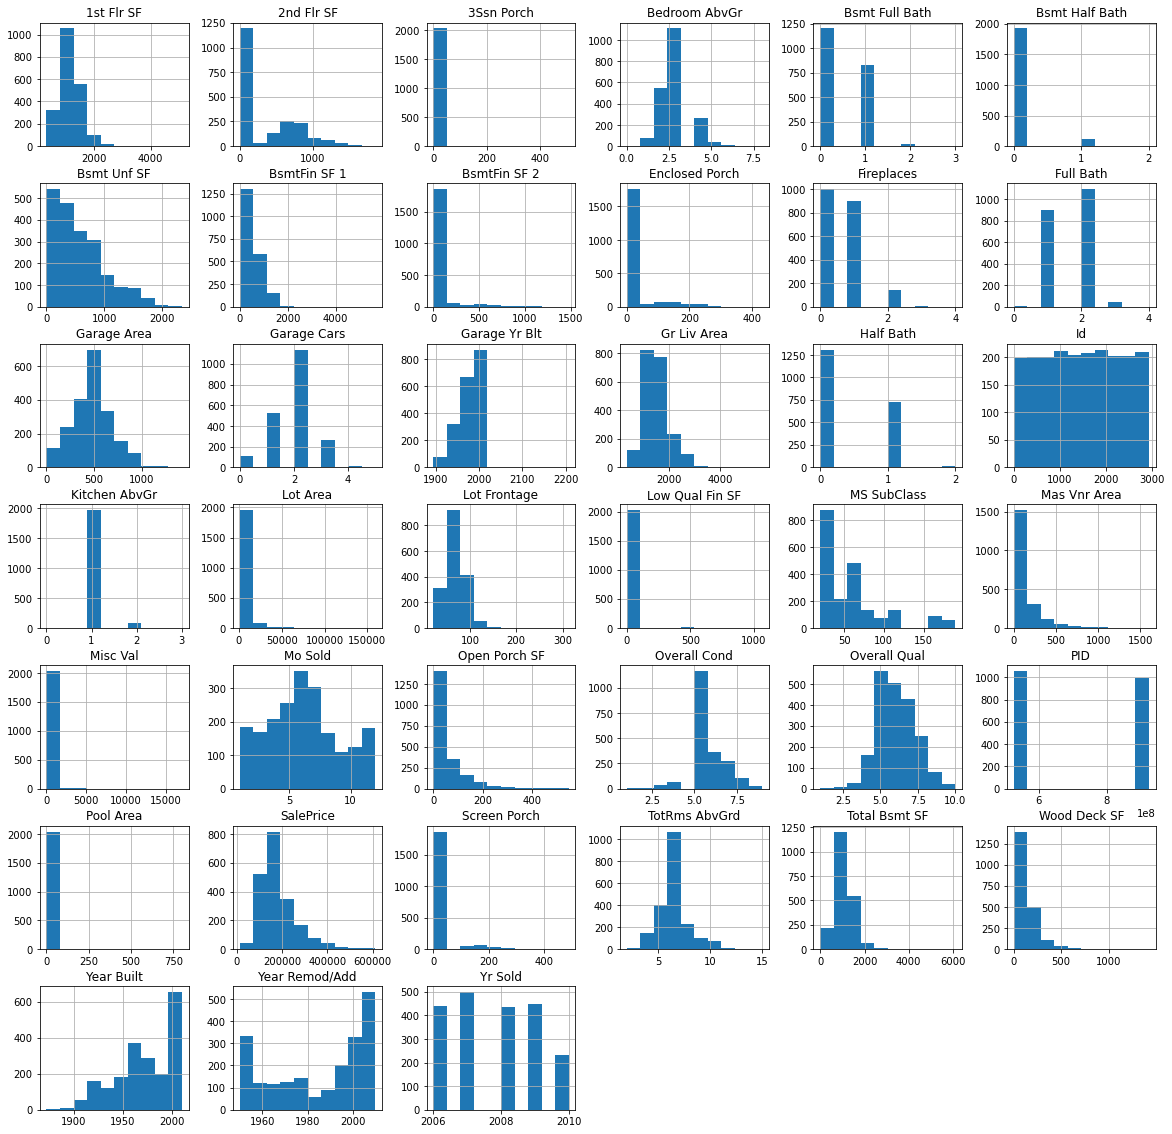

In [14]:
# Check the histograms for all numerical columns; consider which values are not normalized 
# and should be logged and scaled before incorporating into the model

df.hist(figsize=(20, 20));